# __Convolutional Neural Networks: Facial Emotion Detection__
---
By Abdullah Ayub

# __Introduction__

In this project, I will detect the facial expression through automatic system. Emotion recognition is the process of identifying the human emotion. It the technology used for to analyse human emotions from images or live videos and then stated out the result on the basis of emotions classification.
[Facial emotion Recognition](https://en.wikipedia.org/wiki/Emotion_recognition)

The programmed facial appearance has many applications for instance, Social Behaviour Understanding, recognition of mental condition, and artificial humanoid expression. One of the main uses of this automatic system is to evaluate the candidate during the interview and to measure how he defended to certain questions. It is also useful and important for security and healthcare purposes.
[Applications](https://en.wikipedia.org/wiki/Emotion_recognition#applications). 


I have worked on facial emotion recognition, build a model using TensorFlow library. This project will recognize your facial emotions using live webcam feed. The main processes in this project are as follows:


• Upload and Adjust the Data set

• Implementing the Facial Emotion Recognition Model Using CNN

• Compile And Train Model Using CNN

• Evaluate the Model

• Save CNN Model

• Evaluate The Model

• Test the Model


###### __Importing Libraries__

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns

###### __Importing Deep Learning Libraries__

###### TensorFLow Library
Free open source library developed by google. It mostly used in training and deploying ML and deep learning models. 

In [2]:
#Libraries used for Emotion recognitoin
import argparse
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

#### __Upload And Adjust The Data Set__

#### __About DataSet__


Link : [Facial Emotion Data Set](https://www.kaggle.com/datasets/msambare/fer2013)

I have downloaded the data set from the Kaggle.com, publicly available on it. There are two folders one is for training images and other is for testing images. Training Data set has 28709 images and testing data set has total 7,178 examples. 

The data set consists of 48*48 pixels faces images along with the emotions tag. The faces have been consequently enlisted so the face is pretty much more focused and occupies about a similar measure of space in each picture. 

The data set is classified into seven different facial expressions. (0: Angry, 1: Disgust, 2: Fear, 3: Happy, 4: Sad, 5: Surprise, 6: Neutral). 





###### __Displaying Train Images__

In [6]:
# data directory
datadir = 'myData/train'
categories = ["angry","disgust","fear","happy","neutral","sad","surprise"] # emotions
noOfClasses = len(categories)

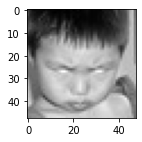

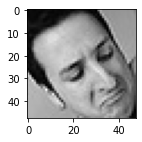

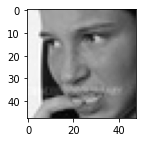

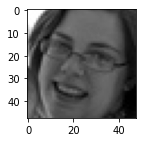

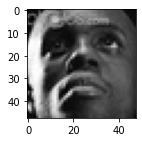

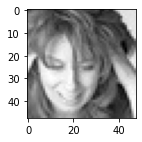

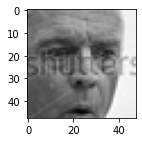

In [7]:
# empyty array
train_imgs = []

for catg in categories:
    path = datadir+"/"+catg # path of All 7 Categories
    myPicList = os.listdir(path)
    for img in myPicList:
        # opencv function is used to read the current images
        curImg = cv2.imread(path+"/"+img, cv2.IMREAD_GRAYSCALE) # converted into grayscale Image
        train_imgs.append(curImg)
       # curImg = cv2.resize(curImg, (32,32))
        plt.figure(figsize=(2,2))
        plt.imshow(curImg,cmap="gray")
        plt.show()
        break

###### __Preparing The data set__

In [8]:
train_imgs

[array([[ 50,  32,  15, ..., 133, 151,  86],
        [ 57,  34,  22, ..., 138, 151,  89],
        [ 61,  30,  24, ..., 142, 149,  89],
        ...,
        [103, 100, 100, ..., 149, 104,  85],
        [107, 111, 113, ..., 151, 120,  86],
        [104, 104, 112, ..., 143, 136,  83]], dtype=uint8),
 array([[  7,  11,   8, ..., 127, 124, 109],
        [  8,  10,   9, ..., 129, 129, 118],
        [  8,   9,  10, ..., 129, 132, 126],
        ...,
        [152, 153, 152, ..., 101,  25,   1],
        [151, 152, 151, ...,  77,   2,   6],
        [150, 150, 150, ...,  17,   7,   8]], dtype=uint8),
 array([[243, 244, 241, ...,  22,  21,  17],
        [244, 244, 242, ...,  41,  24,  18],
        [242, 242, 242, ...,  62,  39,  25],
        ...,
        [237, 241, 241, ...,  29,  39,  52],
        [241, 242, 244, ...,  40,  50,  79],
        [240, 242, 221, ...,  52,  76,  97]], dtype=uint8),
 array([[255, 254, 255, ...,  65,  64,  51],
        [255, 255, 253, ...,  47,  55,  62],
        [255, 25

In [91]:
train_imgs[0]

array([[ 50,  32,  15, ..., 133, 151,  86],
       [ 57,  34,  22, ..., 138, 151,  89],
       [ 61,  30,  24, ..., 142, 149,  89],
       ...,
       [103, 100, 100, ..., 149, 104,  85],
       [107, 111, 113, ..., 151, 120,  86],
       [104, 104, 112, ..., 143, 136,  83]], dtype=uint8)

In [9]:
# images 48*48 pixel, grayscale image
train_imgs[0].shape

(48, 48)

In [10]:
# type of the Image is List array
type(train_imgs)

list

In [11]:
# Resizing the Data set

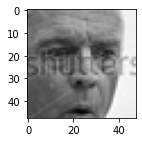

In [12]:
img_size = 48
newImg = cv2.resize(curImg,(img_size,img_size))
plt.figure(figsize=(2,2))
plt.imshow(newImg,cmap="gray")
plt.show()


#### __Making Training and Testing Data__

###### __Image Augmentation for Facial Emotion Detection__

Image Augmentation for Facial Emotion Detection, expand the dataset for to get the higher performance and accuracy. I rescale the image, rotate the image, flip the image, shift the image and then train the model. It is always a good practice before training


In [13]:
# Define data generators.It is basically the path of train and test dataset
train_dir = 'myData/train'
val_dir = 'myData/test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 48

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 10, 
                                   horizontal_flip = True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

######  __Fitting the generator to our data__

In [14]:
#Fitting our data dataset to the generator.
#We are using batch size 64, to train our model
#target size used 48*48 pixels
# two types of data set gnerator
#1) Traing data set
#2) Testing Data set


# Training Data set generator
train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Testing Data set Generator
test_set = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# __Mathedology__
---
### __Implementing the Facial Emotion Recognition Model Using CNN__

There are lot of ML and deep learning algorithms which you can use for to train this type of data set. But I have used the most popular deep learning architecture for recognition problems, such as Convolutional Neural Network because it is one of the most powerful modules of deep learning. Normally it’s gives higher accuracy, if you train your model on it. As my data set related to facial images, so I decided to use this model. 

The model used to abstract the features from images to detect the emotions. There are specific layers that extract the features of this image, it keeps extracting the features and then classify all those images and then accordingly recognize the image. 

Designing the CNN model for emotion recognition using functional API. I have added the CNN layers. Like, Conv2D layer, Batch Normalization, Max-Pooling2D, Dropout layer, Flatten and then fitted the data to fully linked dense layer.

• I have added Four CNN layer with the same Parameters.

• Added flatten layer to convert the data of CNN into 1D that would be fitted for fully connected Dense layer.

• Then compile the data with 2 Dense Layers. 

#### Network

• The CNN contains 64 filters in the first layer with ReLU, 128 filters on the second layer, 512 on the third and then again   512 on to the fourth layer of CNN model. All layers use ReLU activation. Max Pooling was done after every CNN layer to improve the speed of the network. 

• A dense network was built over the CNN. It contains first dense layer with 256, second dense layer of 512 and then added 7 neuron with activation SoftMax. 

• Batch normalization was done before every layer in the network  


In [15]:
#Creatimg the Cnn model
no_of_classes=7

model=Sequential()

# Added Four CNN layers with same parameters

#1st CNN layer
model.add(Conv2D(64, kernel_size=(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,kernel_size=(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,kernel_size=(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flatter will convert the data into 1D array form, that would be fitted for fully connected dense layer.
model.add(Flatten())

# Added two fully connected layers(Dense Layers)

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))


# Model Compilation
#optimiser Adam and Learning Rate lr=0.0001
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

#### __Compile And Train Model Using CNN__

##### Early Stopping
It is when my model is going to fetch the data that the accuracy is very good at this stage is this iteration so that will stop that iteration. It will check that model performance is improving or not then it will stop the training process, and will pick the best iteration model.

##### Reduce Learning rate
It is responsible to determine the optimal value of Learning rate that was being used in the training process. 

In [99]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

# Total number of epochs
epochs = 48

#training the model
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

###### __Training the model__
---
Now I am going train my model with the facial expressions data set. The file contains 28,709 examples, 7 folders and size of the file is 43MB.

__Note__: As I have used my laptop, an inter core i7 with 8GB Ram, I think this processor is not enough to train this type of model. We required heavy GPU and RAM for to get the higher accuracy of the model. 

__Note:__
I have already trained the model using dataset of facial expressions, no need to retrain it agin.
If you want to test the model just run the below code. Otherwise my system will take the longer time if you put it on retraining.

In [12]:
#Fitting the model
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/48
448/448 [==============================] - 1020s 2s/step - loss: 1.8512 - accuracy: 0.2729 - val_loss: 2.1619 - val_accuracy: 0.2606
Epoch 2/48
448/448 [==============================] - 977s 2s/step - loss: 1.5384 - accuracy: 0.4043 - val_loss: 1.5168 - val_accuracy: 0.4429
Epoch 3/48
448/448 [==============================] - 1137s 3s/step - loss: 1.3665 - accuracy: 0.4746 - val_loss: 1.2782 - val_accuracy: 0.5095
Epoch 4/48
448/448 [==============================] - 981s 2s/step - loss: 1.2975 - accuracy: 0.5013 - val_loss: 1.3989 - val_accuracy: 0.4662
Epoch 5/48
448/448 [==============================] - 980s 2s/step - loss: 1.2435 - accuracy: 0.5274 - val_loss: 1.3821 - val_accuracy: 0.4621
Epoch 6/48
448/448 [==============================] - 980s 2s/step - loss: 1.2090 - accuracy: 0.5395 - val_loss: 1.2786 - val_accuracy: 0.5102
Epoch 7/48
448/448 [==============================] - 977s 2s/st

In [13]:
history

### __Save CNN Model__
This is the file of updated weights that save in the directory

In [17]:
model.save_weights('model.h5')

# __Results__
---

#### __Plot the Results__
plot the results of Loss and Accuracy curve

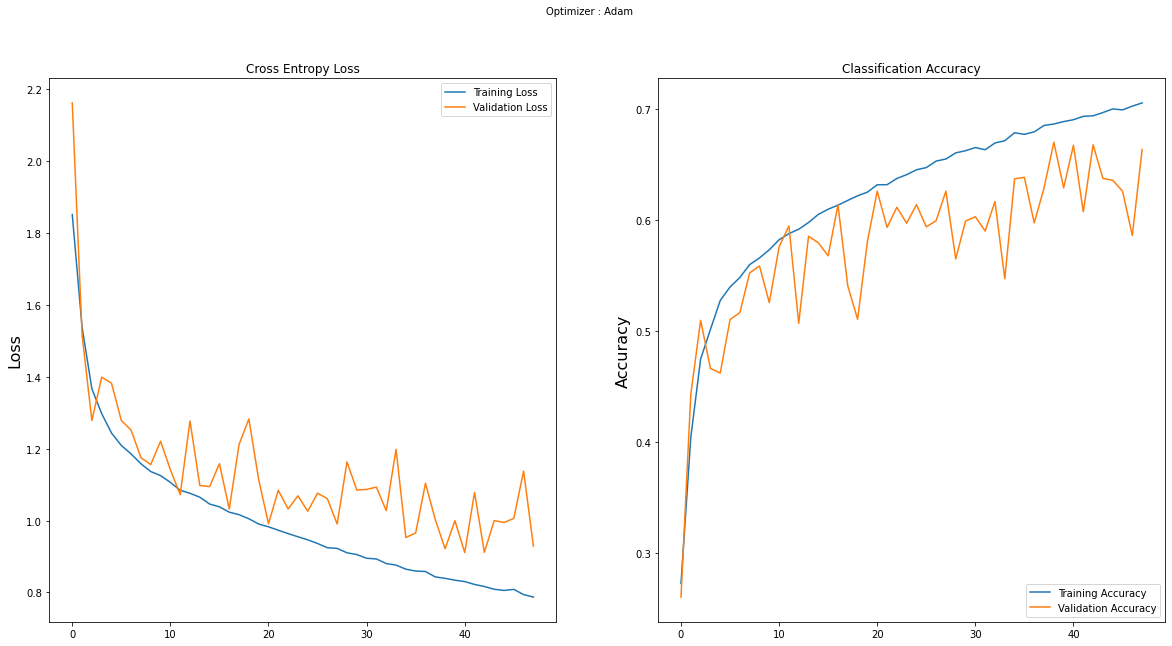

In [14]:
def diagnostic(history, filename=None):
    # Entropy Loss plot
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.title('Cross Entropy Loss')
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.title('Classification Accuracy')
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    #plt.show()
    
    # Save plot if filename provided
    if filename is not None:
        plt.savefig(filename)
        plt.close()
        

diagnostic(history)
    

The results achieved on the training dataset (blue) and the test dataset is (orange). Although results shown on the plot are not much accurate, there is lot of inflation between training and validation results. I think we need to expand our data set, and to use heavy GPU or processor machine for training. As on my laptop it took more than 10 hours for 48 epochs, but just got only about 70% accuracy. 

#### __Evaluate The Model__
Checked the Accuracy of the model

In [52]:
test_set.target_size

(48, 48)

In [53]:
y_pred = model.predict(test_set).round(2) 
y_pred

array([[0.01, 0.  , 0.15, ..., 0.11, 0.6 , 0.  ],
       [0.6 , 0.02, 0.07, ..., 0.  , 0.05, 0.  ],
       [0.7 , 0.02, 0.12, ..., 0.02, 0.14, 0.01],
       ...,
       [0.16, 0.  , 0.02, ..., 0.41, 0.13, 0.01],
       [0.04, 0.  , 0.33, ..., 0.02, 0.6 , 0.  ],
       [0.14, 0.  , 0.01, ..., 0.  , 0.  , 0.02]], dtype=float32)

In [54]:
class_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

In [59]:
y_pred_labels=[np.argmax(label) for label in y_pred]

In [60]:
# evaluate model
loss, acc = model.evaluate(test_set,verbose=0)
# Print final accuracy
print('Cross Entropy Loss: %.2f' % loss)
print('Accuracy: %.2f%%' % (acc * 100.0))

Cross Entropy Loss: 0.93
Accuracy: 66.36%


The result printed on the screen should show a value close to 70% accuracy and loss is 0.93. My model took almost more than 10 hour to train these images data set over 48 epochs complete. Although accuracy is not enough, but I think my system machine is not much capable for to accurately train this type of model. 

##### Looking into the CNN

Let me show you inside the black box. Those are the values of the weights after neural network has been trained. In the case of CNN, generally it difficult to understand the model, beacuse you can see how much complex models calculation are there, it is difficult to grasp what kind of features and pattern they are picking from image.


In [61]:
# get wieghts of first convolutional layer
weights, bias = model.layers[0].get_weights()
weights

array([[[[-1.16075752e-02, -5.48695102e-02,  9.38386545e-02,
          -1.96268633e-02, -1.21354319e-01, -1.16797909e-01,
           2.11075351e-01, -3.32967825e-02,  2.01317653e-01,
           1.37949632e-02, -1.07540205e-01, -5.92504404e-02,
           2.96596810e-02,  6.18138947e-02, -1.54979557e-01,
           9.88099650e-02, -5.01907356e-02,  1.61497489e-01,
          -1.17954828e-01,  5.72902113e-02, -9.22533125e-02,
           1.99394241e-01, -4.36660387e-02,  2.23587736e-01,
          -3.45160738e-02,  1.75753191e-01,  1.41962498e-01,
           1.38135910e-01,  2.21706927e-02,  1.51269853e-01,
           2.35256970e-01,  9.60898027e-02,  1.03872456e-01,
           2.96061169e-02,  1.88948482e-01, -1.78963244e-01,
           7.47854784e-02,  1.20849915e-01, -9.20149535e-02,
          -4.06910032e-02,  1.56540871e-01,  2.54659578e-02,
           9.16785300e-02, -2.11583912e-01,  9.44935828e-02,
           1.13717236e-01, -8.45322609e-02,  3.83745953e-02,
           7.30466917e-0

### __Test The Model__
Test the model using live webcam feed and then predict the emotions. 

__Note:__
I have already trained the model using dataset of facial expressions, no need to retrain it agin.
If you want to test the model just run the below code. Otherwise my system will take the longer time if you put it on retraining.

#### __Live Web Cam__

In [16]:
    # start the webcam feed
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 500)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 600) 
    if not (cap.isOpened()):
        print("Camera not working")
        exit()

In [17]:
# We are using Haar-cascade for the detection position of faces.
face_classifier = cv2.CascadeClassifier(r'haarcascade_frontalface_default.xml')
# emotions will be displayed on your face from the webcam feed
# Here we load the treained model i.e model.h5 
classifier =load_model(r'model.h5')

# List of Emotions in the Alphabatic Order
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)


while True:
    #Here we read the each frame
    _, frame = cap.read()
    labels = []
    # cv2.cvtColor() method is used to convert an image from one color space to another
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    #detectMultiScale function is used to detect the faces. 
    #This function will return a rectangle with coordinates(x,y,w,h) around the detected face.
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        # creating the rectangle on to the frame
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        # Croppig the region of interest
        roi_gray = gray[y:y+h,x:x+w]
        # Resize the image
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            #applying model on detected faces
            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y-10)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    #Showing the frame
    cv2.imshow('Emotion Detector',frame)
    #Code for pressing 'q' key in order to exist program
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Result Images 

#### Output Images ScreenShot

As you can see, Camera is not so good and even lights are not proper. So, then i test the model using to get images from google randomly by surfing different human epression images and place it infront the system for te check the results. The system predict quite accurate results


My Image
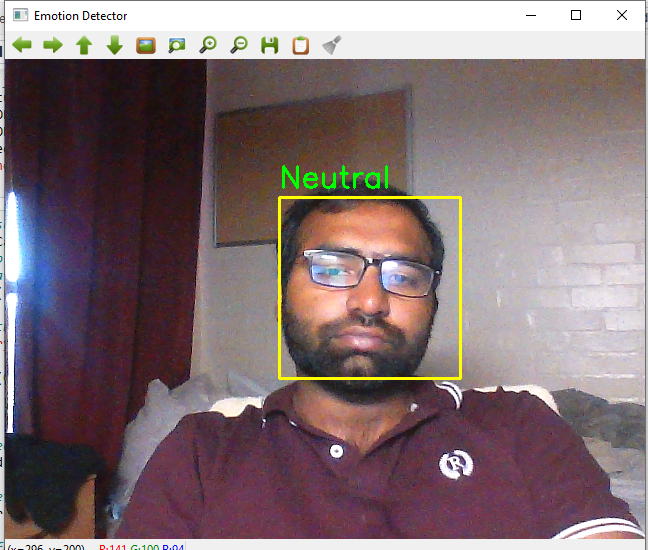

#### Happy Emotion Prediction

I open the image on google randomly and then predict the results. As ou can see in the figures the model predicting quite accurate results:


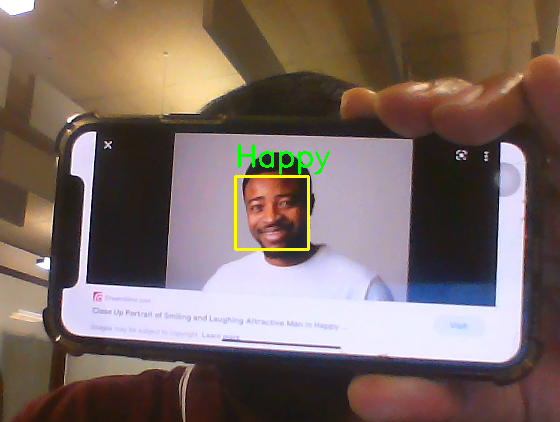


#### Angry Emotion Prediction
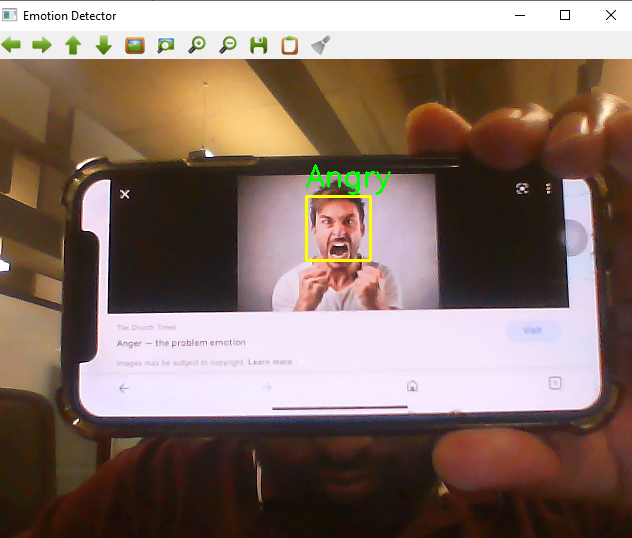

# __Conclusion__
---

In this project we have seen how to prepare the data set, how to build the CNN model that is capable for recognizing the basic human emotions. I used OpenCV library for live webcam and then predicting the results. Right now, I got just 70% accuracy, we can improve further by:

Using VGG-16 model.

By performing some fine tunning. 

And cleaning the data set. 

By Expanding Data Set.

By using Heavy Processor and GPU.






## References
[1:][Convolutional Neural Networks for Facial Expression Recognition](http://cs231n.stanford.edu/reports/2016/pdfs/005_Report.pdf)

[2:] Nur Alia Syahirah Badrulhisham and Nur Nabilah Abu Mangshor 2021 J. Phys.:
     Conf. Ser. 1962 012040 
#### Help
[3:]From Moodle Convolution neural networks
[Deep Learning section](https://moodle.essex.ac.uk/course/view.php?id=15076&section=7) of the Moodle page.
